In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np

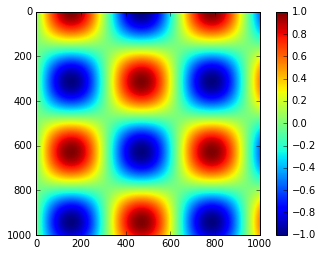

In [10]:
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])
plt.imshow(I)
plt.colorbar();

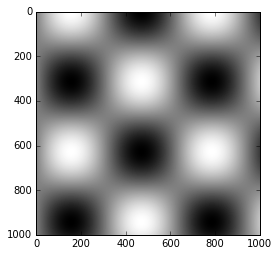

In [11]:
plt.imshow(I, cmap='gray')

In [13]:
from matplotlib.colors import LinearSegmentedColormap
def grayscale_cmap(cmap):
    """Возвращает версию в оттенках серого заданной карты цветов"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    # Преобразуем RGBA в воспринимаемую глазом светимость серого цвета
    # ср. http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
    return LinearSegmentedColormap.from_list(cmap.name + "_gray", 
    colors, cmap.N)
def view_colormap(cmap):
    """Рисует карту цветов в эквивалентных оттенках серого"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))
    fig, ax = plt.subplots(2, figsize=(6, 2),
                           subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

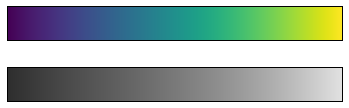

In [14]:
view_colormap('viridis')

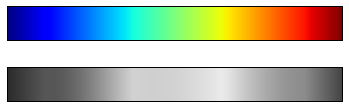

In [15]:
view_colormap('jet')

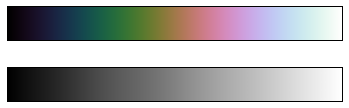

In [16]:
view_colormap('cubehelix')

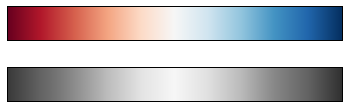

In [17]:
view_colormap('RdBu')

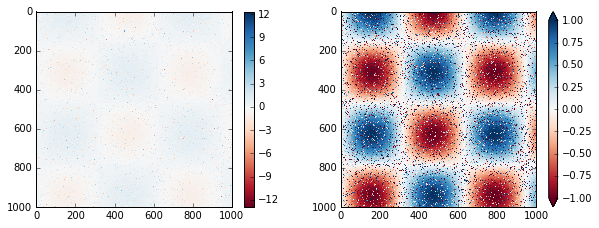

In [21]:
# создаем шум размером 1% от пикселов изображения
speckles = (np.random.random(I.shape) < 0.01)
I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles))
plt.figure(figsize=(10, 3.5))
plt.subplot(1, 2, 1)
plt.imshow(I, cmap='RdBu')
plt.colorbar()
plt.subplot(1, 2, 2)
plt.imshow(I, cmap='RdBu')
plt.colorbar(extend='both')
plt.clim(-1, 1);

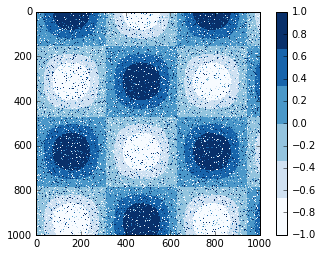

In [22]:
plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 6))
plt.colorbar()
plt.clim(-1, 1)

In [23]:
# Загружаем изображения цифр от 0 до 5 и визуализируем некоторые из них
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)

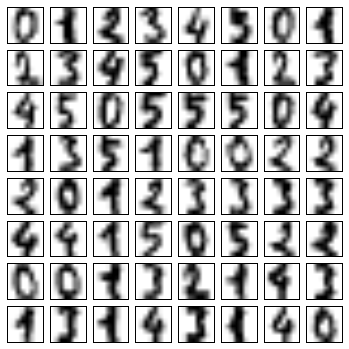

In [24]:
fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

In [25]:
# Отображаем цифры на двумерное пространство с помощью функции IsoMap
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
projection = iso.fit_transform(digits.data)

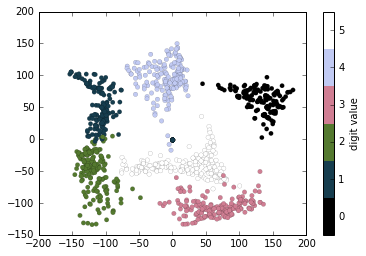

In [26]:
# Выводим результаты на график
plt.scatter(projection[:, 0], projection[:, 1], lw=0.1,
            c=digits.target, cmap=plt.cm.get_cmap('cubehelix', 6))
plt.colorbar(ticks=range(6), label='digit value')
# Цифровые значения
plt.clim(-0.5, 5.5)